<a href="https://colab.research.google.com/github/gauravguptagtm/100-days-of-deep-learning/blob/main/DL_16(Regularization).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regularization

- It used when model do overfitting.
- Data Augumentation also used for solve overfitting.
- Regularization reduces the model complexity.
- L1, L2 and L1+L2 regularization
- In regularization, we add a penalty term to our cost funtion.
- In L2, penalty term is
$$
\frac{λ}{2n}Σ_{i=1}^{k}||w||^2
$$

where λ is hyperparemeter, which gives weightage, as increases, goes towards underfitting.

- In L1, penalty term is:
$$
\frac{λ}{2n}Σ_{i=1}^{k}||w||
$$
- We can't do sqaure of bias terms.
- Also called weight dacay sometimes.

### Intution behind Regularization

- Weight gets small during L2 regularization.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

In [2]:
X, y = make_moons(100, noise=0.25,random_state=2)

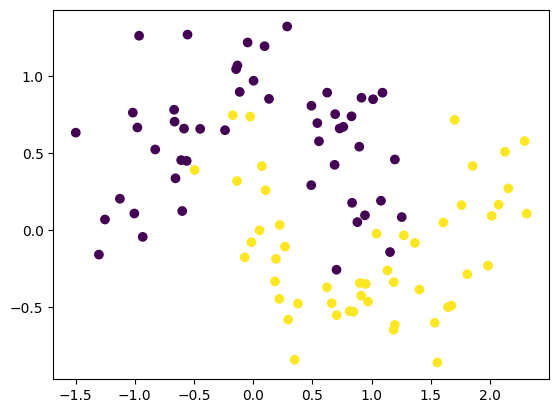

In [3]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [4]:
model1 = Sequential()

model1.add(Dense(128,input_dim=2, activation="relu"))
model1.add(Dense(128, activation="relu"))
model1.add(Dense(1,activation='sigmoid'))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               384       
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17025 (66.50 KB)
Trainable params: 17025 (66.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [5]:
adam = Adam(learning_rate=0.01)
model1.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history1 = model1.fit(X, y, epochs=2000, validation_split = 0.2,verbose=0)

9600/9600 [==============================] - 13s 1ms/step


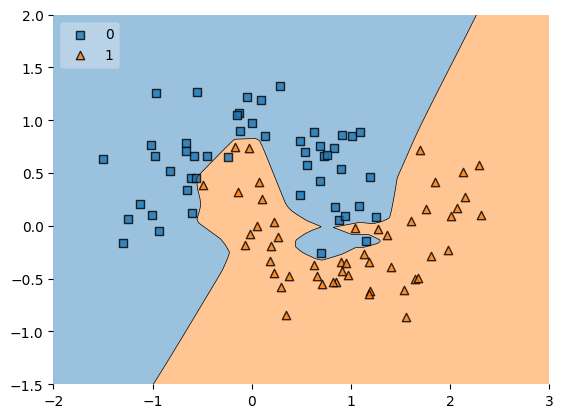

In [6]:
plot_decision_regions(X, y.astype('int'), clf=model1, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

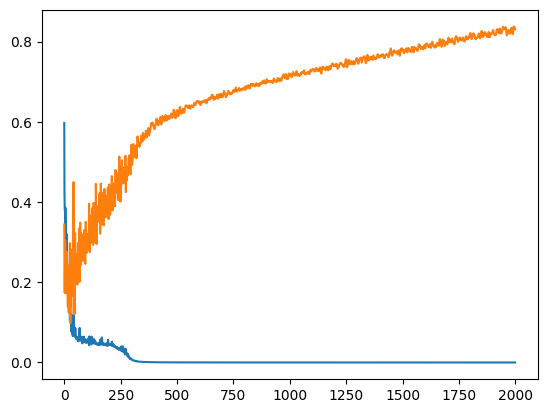

In [7]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])

In [23]:
model2 = Sequential()

model2.add(Dense(128,input_dim=2, activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l2(0.03)))
model2.add(Dense(128, activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l2(0.03)))
model2.add(Dense(1,activation='sigmoid'))

model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 128)               384       
                                                                 
 dense_10 (Dense)            (None, 128)               16512     
                                                                 
 dense_11 (Dense)            (None, 1)                 129       
                                                                 
Total params: 17025 (66.50 KB)
Trainable params: 17025 (66.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
adam = Adam(learning_rate=0.01)
model2.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history2 = model2.fit(X, y, epochs=2000, validation_split = 0.2,verbose=0)

9600/9600 [==============================] - 13s 1ms/step


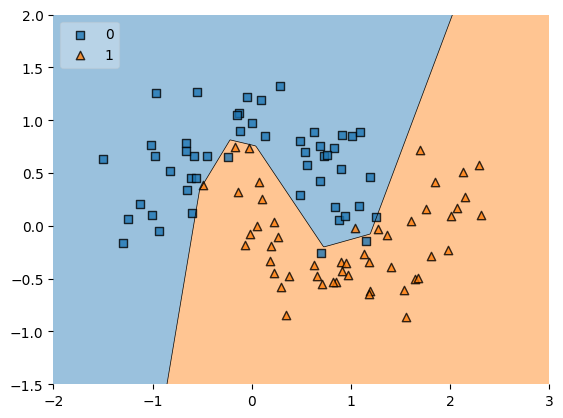

In [25]:
plot_decision_regions(X, y.astype('int'), clf=model2, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

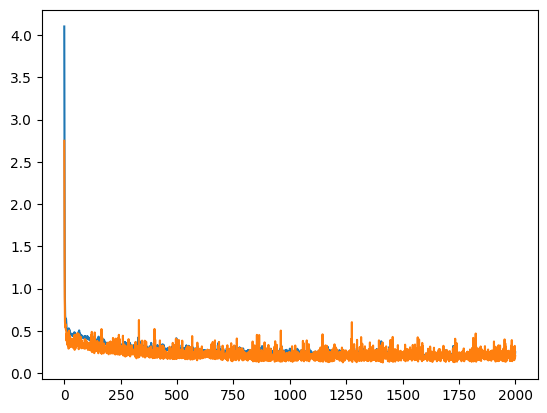

In [26]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])

In [27]:
model1_weight_layer1 = model1.get_weights()[0].reshape(256)
model2_weight_layer1 = model2.get_weights()[0].reshape(256)

<Axes: >

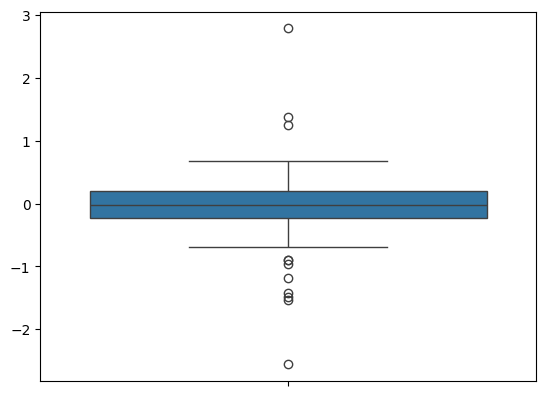

In [28]:
sns.boxplot(model1_weight_layer1)

<Axes: >

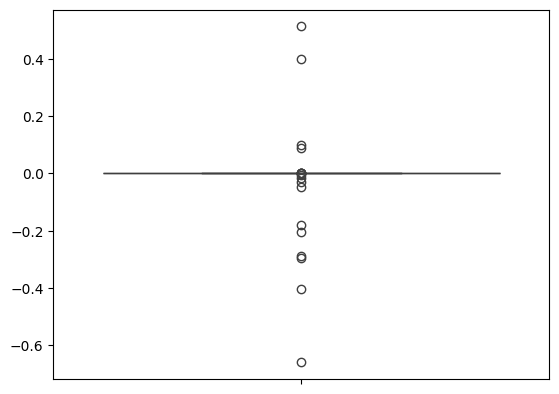

In [29]:
sns.boxplot(model2_weight_layer1)

In [30]:
model1_weight_layer1.min()

-2.5561585

In [34]:
model2_weight_layer1.max()

0.51275766

<ipython-input-32-99b939c7ee98>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model1_weight_layer1)
<ipython-input-32-99b939c7ee98>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model2_weight_layer1)


<Axes: ylabel='Density'>

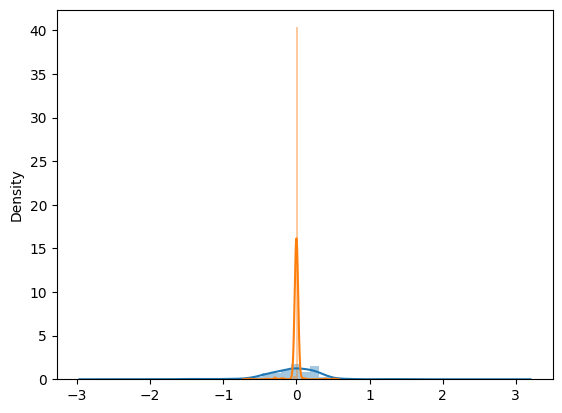

In [32]:
sns.distplot(model1_weight_layer1)
sns.distplot(model2_weight_layer1)

In [33]:
model1.get_weights()[0].reshape(256)

array([-2.60759555e-02,  8.82342458e-02, -5.24946600e-02, -2.35760864e-03,
        1.95151851e-01, -3.65456939e-01, -4.97127563e-01,  3.00783932e-01,
       -4.37092811e-01,  1.74929455e-01, -7.04788864e-02, -4.73568648e-01,
        7.49596059e-02, -1.56226099e-01, -3.26092809e-01,  2.06642464e-01,
        1.25173992e-02,  2.95505702e-01,  2.24577323e-01, -1.97938442e-01,
       -5.31385362e-01, -2.85512656e-01,  1.31595418e-01, -1.70735046e-01,
        1.55797631e-01, -1.31343249e-02, -8.37398469e-02,  3.25792693e-02,
       -3.18397045e-01,  2.70288408e-01,  2.99047649e-01, -2.12136526e-02,
       -3.18685807e-02,  9.23218355e-02,  4.73636657e-01, -8.64600837e-02,
        1.87345073e-02, -1.50197074e-01,  3.12454849e-01, -9.75905918e-03,
       -4.51671153e-01, -4.03105974e-01, -3.58262174e-02,  2.67564803e-01,
        3.49284738e-01,  2.62818485e-01, -3.19479823e-01, -3.50483954e-01,
       -3.92635196e-01,  2.67995864e-01, -2.55972028e-01,  2.64183998e-01,
       -8.18142369e-02, -